# SLU4 - Data Visualization: Learning notebook

In this notebook we will cover the following: 

- Scatterplots
- Line charts
- Bar charts
- Histograms
- Box plots
- Scaling plots
- Chartjunk
- Matplotlib basics
- How to choose the right chart

We start by importing pandas and matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is a library initially designed to save charts to files.

When plotting charts on a jupyter notebook we have tell jupyter that we want to render the plots inside the notebook

The most common way to specify this is by using one jupyter notebook [magic commands](http://ipython.readthedocs.io/en/stable/interactive/magics.html), which are ways to modify the default behavior of the notebook.

`%matplotlib inline` will set up the notebook to be used with matplotlib.

In [2]:
%matplotlib inline

The dataset we are going to use is a variation of the Online Retail Dataset ([source](http://archive.ics.uci.edu/ml/datasets/online+retail))

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

In [3]:
data = pd.read_csv("data/online_orders.csv")

In [4]:
data.head()

,country,date,sales,n_items,n_orders,day_of_week
0,Australia,2010-12-01,358.25,107,1,2
1,Australia,2010-12-08,258.90,214,1,2
2,Australia,2010-12-17,415.70,146,1,4
3,Australia,2011-01-06,7154.38,4802,2,3
4,Australia,2011-01-10,81.60,96,1,0


The dataset consists of the following fields.

- *country*: Country name
- *date*: Date the row is showing a summary of
- *sales*: Total sales revenue (in UK pounds) for that country and date
- *n_items*: Number of items sold
- *n_orders*: Number of different online orders
- *day_of_week*: Day of week


### Scatter plots

We can use a scatter plot to see the relationship between the number of items sold and the total sales revenue

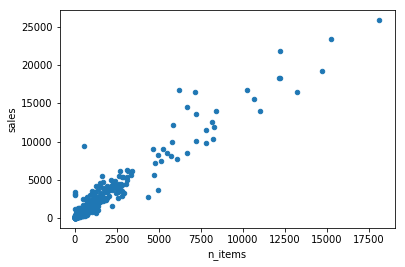

In [5]:
data.plot.scatter(x='n_items', y='sales');

We have made our very first chart, yaaaay!!

**Note**: You see that I add a semicolon (;) at the end of the cell, that is because jupyter notebooks by default return the last value., so if I run the cell without the notebook, the plot object will be displayed.

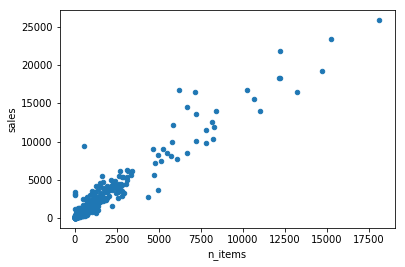

In [6]:
data.plot.scatter(x='n_items', y='sales')

Depending on your browser and your screen resolution, you might think that the previous chart is small. We can fix this by changing the matplotlib options to render bigger charts.

We can set the chart size globally by changing the matplotlib default settings. These are included in the dictionary `matplotlib.rcParams`.

The plot size is defined as a list with 2 elements, `[width, height]` in inches

In [7]:
import matplotlib

In [8]:
matplotlib.rcParams["figure.figsize"] 

[6.0, 4.0]

So the default chart size is 6 inches wide by 4 inches tall, which is fairly small.

For example, if we want to set the chart size as 10 inches wide by 10 inches high, we would do so as:

In [33]:
matplotlib.rcParams["figure.figsize"] = [14, 14]

Now if we plot the same chart again, we see its bigger:

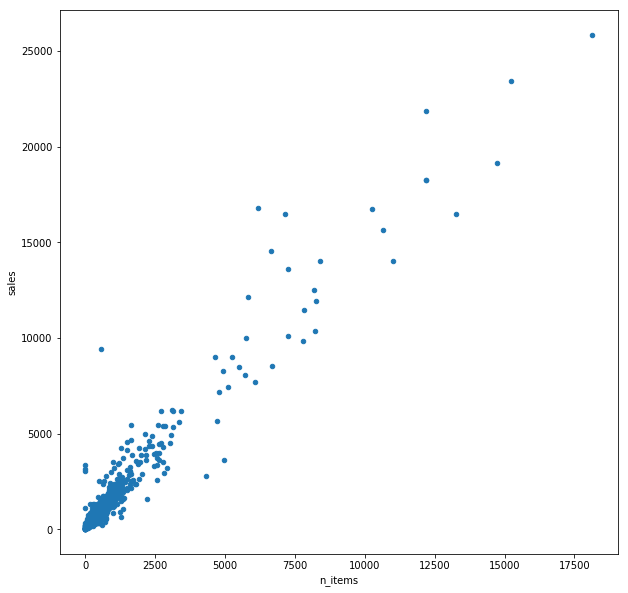

In [10]:
data.plot.scatter(x='n_items', y='sales');

Alternatively, we can use the `%matplotlib notebook` magic command, which adds a small widget to visualize charts.

In [13]:
%matplotlib notebook

Now we can plot the chart again *(if it doesnt work, try running the magic cell again)*

<IPython.core.display.Javascript object>


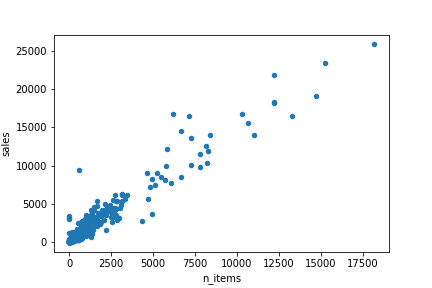

In [14]:
data.plot.scatter(x='n_items', y='sales');

When you use the notebook magic, you get to resize, zoom, and export the image. One important point to note is that the notebook magic embedds a widget in the notebook, and we need to shut it down every time we do a chart (by clicking the on/off button on top of the widget).

Generally, when we are plotting for our own use (and we do not need to make very big plots), using `%matplotlib inline` and setting a decent plot size is simpler and works.

In [15]:
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = [14, 14]

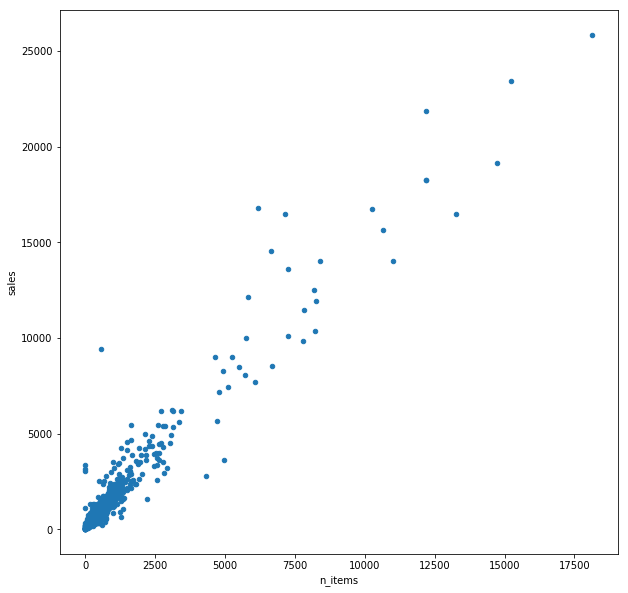

In [16]:
data.plot.scatter(x='n_items', y='sales');

No surprises here, we see that there is a linear relationship between the number of items purchased and the sales revenue

We can see for example how do sales relate to the day of week

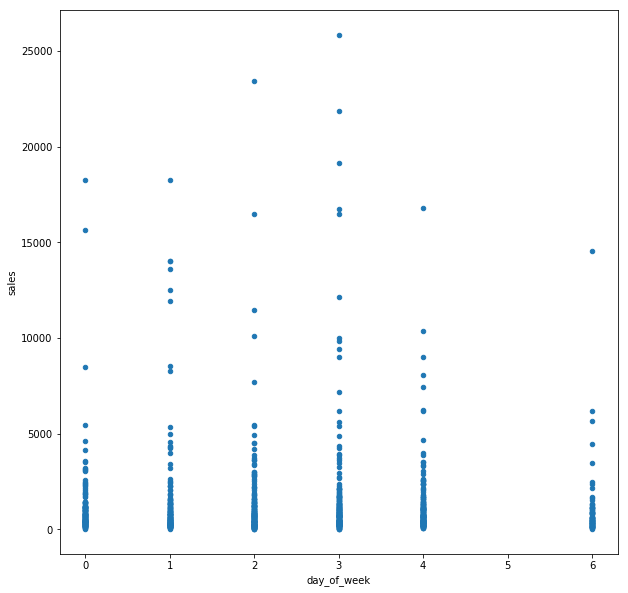

In [17]:
data.plot.scatter(x='day_of_week', y="sales");

We can see that sales are generally equaly distributed, except a little uptick on Thursdays and no sales at all on Saturday!

Here we can see how data visualization can help us with the data QA (Data Quality Assurance), and can help us detect inconsistencies or errors in the data. In this case we would need to make sure everything is correct, since online sales dont usually stop on saturdays.

# Line Chart

We use line charts generally when we want to see the trend of one (or many variables) over time. For example, lets say we want to see the sales in germany compared to france over time. Pandas `plot` method tries a line plot by default.

We can set the index of the dataframe to the date and pandas plot method will automatically pick it up as the x axis

In [18]:
data_indexed = data.set_index('date')

In [19]:
data_indexed.head()

,country,sales,n_items,n_orders,day_of_week
date,,,,,
2010-12-01,Australia,358.25,107,1,2
2010-12-08,Australia,258.90,214,1,2
2010-12-17,Australia,415.70,146,1,4
2011-01-06,Australia,7154.38,4802,2,3
2011-01-10,Australia,81.60,96,1,0


Pandas plotting library is just a thin wrapper around matplotlib. Matplotlib has a somewhat convoluted api, and pandas makes plotting common charts much easier.

For example, here we call directly matplotlib `legend` to display the legend on top of pandas plots

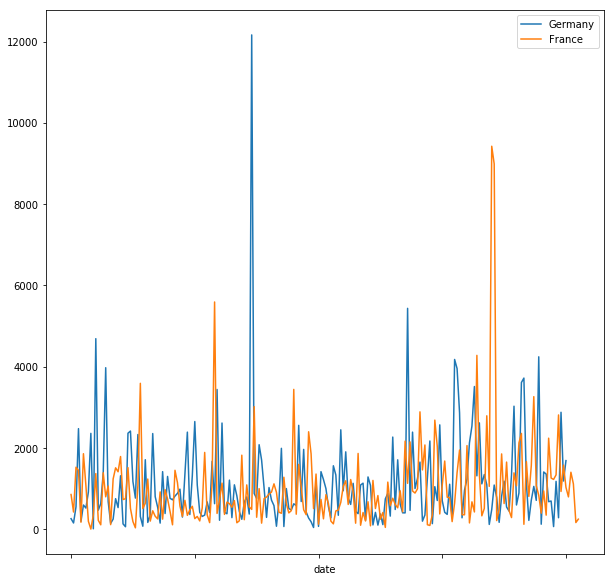

In [20]:
data_indexed[data_indexed.country=='Germany'].sales.plot(label="Germany")
data_indexed[data_indexed.country=='France'].sales.plot(label="France")
plt.legend();

We see that sales numbers in France and Germany are generally similar. And that each country has a spike of sales at a certain day in 2011

**Using matplotlib api**

Sometimes, we want to display some information in a way that pandas `plot` method doesn't allow us to. In those situations we can use matplotlib plt.plot method directly as well. This gives us much more flexibility regarding how we can display the data


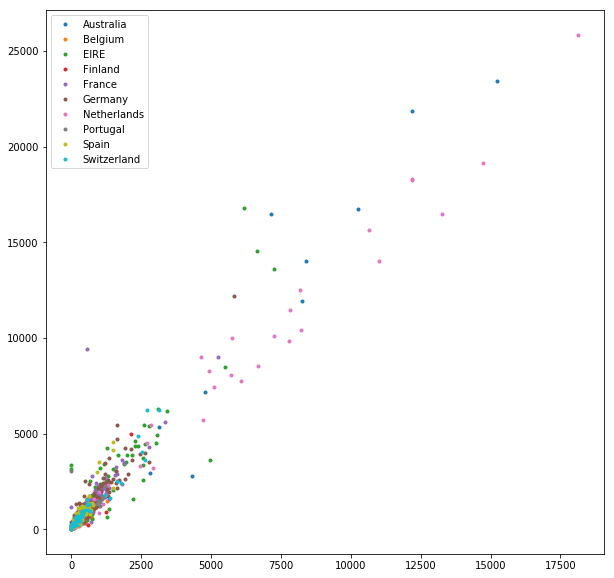

In [21]:
for country in data.country.unique():
    plt.plot(data[data.country == country].n_items,  # plot this series as the x
             data[data.country == country].sales,    #plot this series as the y
             marker='o',   #make the markers circle shaped
             linestyle='', #dont connect the dots with lines
             ms=3,         # size of the markers (in pixels)
             label=country # use the country as the label of this plot
            )

plt.legend();

# Bar/Column chart

We use bar/column charts to perform comparisons of discrete quantities. Normally you use the horizontal bars to compare across elements without a natural order (categorical variable) and Column charts (vertical bars) to compare among an ordinal variable.



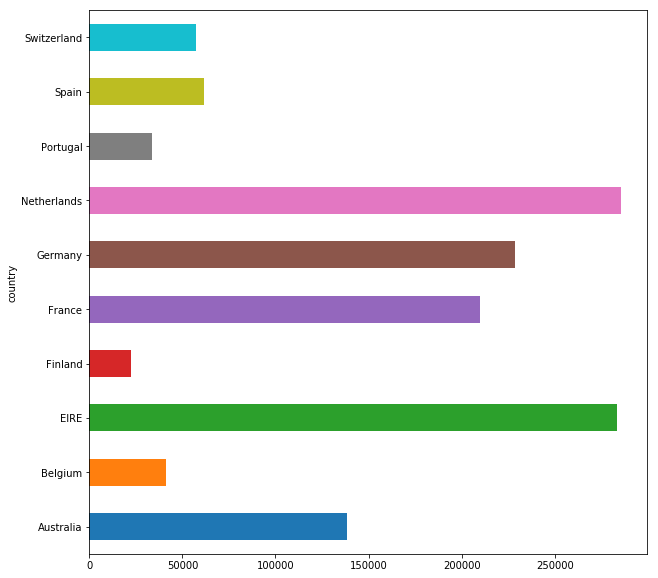

In [22]:
data.groupby('country')['sales'].sum().plot.barh();

Here we can see that the top countries in terms of sales on the dataset are Netherlands, Germany and EIRE. This does not mean that they are the top countries in terms of sales, because remember, the dataset consist of country + date. 

# Histograms

We can use histograms to make sure that nothing is fishy with the data, as well as to gain an understanding of its distribution. For example, we can use it to see how are sales distributed in EIRE

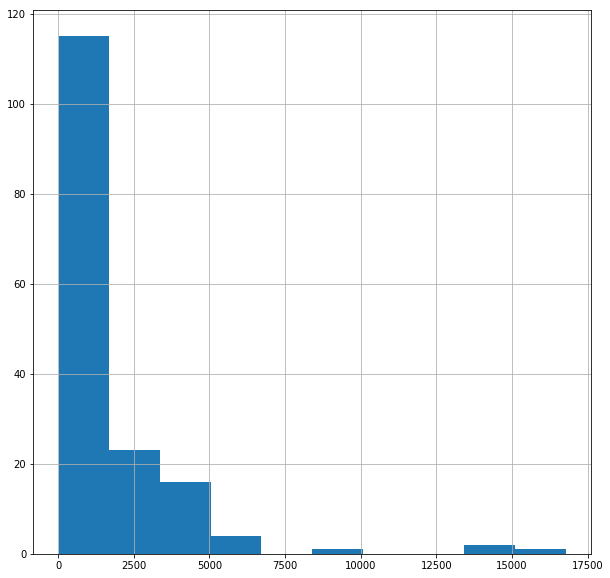

In [23]:
data[data.country=='EIRE'].sales.hist();

Here we can see that, even though the big majority of sales days in EIRE are less than 2500 GBP, some days there are significantly higher sales.

We can limit the extend of the xaxis of a histogram by passing the parameter `xlim` to the plot

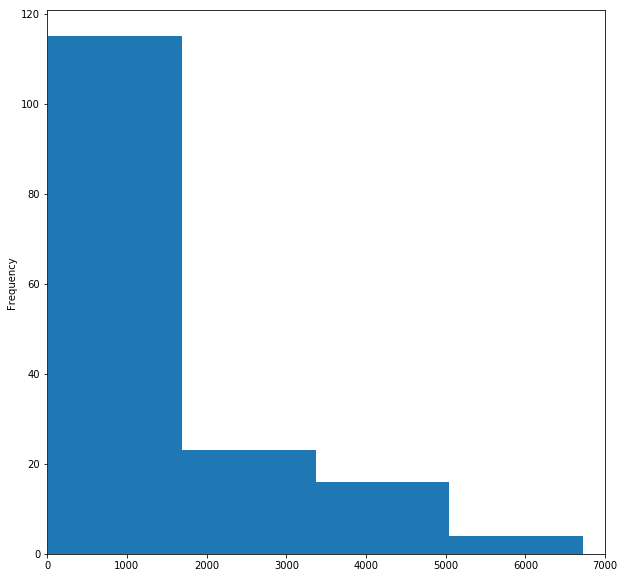

In [24]:
data[data.country=='EIRE'].sales.plot.hist(xlim=(0,7000));

We can also specify the number of *groups* of the histogram by using the paramenter `bins`

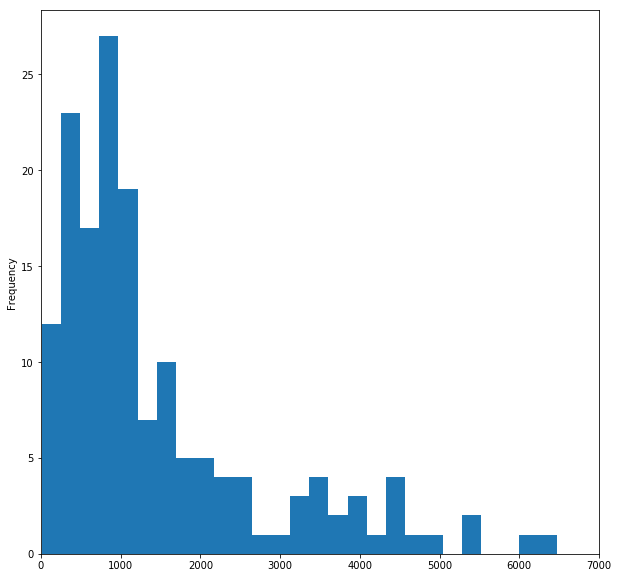

In [25]:
data[data.country=='EIRE'].sales.plot.hist(xlim=(0,7000), bins=70);

So we see that the most common daily sales revenue in EIRE is 1000 GBP per day

### BoxPlot

The box plot (also called plot and whisker diagram) is a good chart when you want to compare how a variable is distributed among different groups. For example, on the chart of the left, we are analyzing the weight of all different car models manufactured in 2004 and comparing between the region of origin of those cars

Outliers on the boxplot (those points beyond the whiskers) are usually considered as being 1.5* IQ from Quartile 1 (low outliers) and 1.5*IQ from Quartile 3 (high outliers)

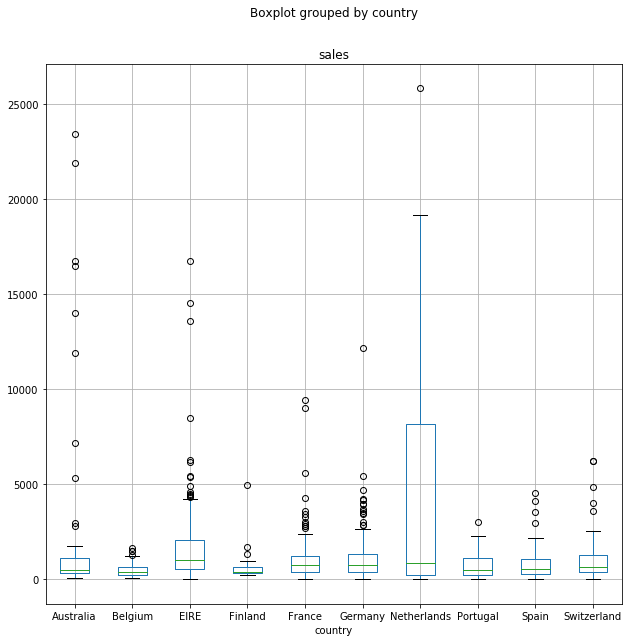

In [26]:
data.boxplot(column="sales", by="country");

Here we see that the top countries in terms of points (France, Germany and Eire) have a significant number of outliers in terms of sales. Netherlands on the other hand, has sales that are more stable (probably a smaller number of bigger orders)

# Customizing plots

Using pandas `.plot` as it is is good enough for when doing data analysis (remember, data understanding is one of the main goals of data visualization). 

However, when we want to share a chart with someone else (wether that person is another data scientist or someone without a technical background), we need to take more steps in order to provide the most effective visualizations.

![xkcd labels strip](https://imgs.xkcd.com/comics/convincing.png)

When producing charts for external use, always remember:

- Add a title describing the chart
- Add labels for all the axes.
- Check the axes limits to make sure they are appropriate and help convey the right information
- Add legends if necessary (when dealing with multiple groups)
- Make sure the color palette you choose will display properly on the medium where it is going to be consumed (for example, which color is the background where the chart will be inserted affects how the chart is visualized)
- It is good practice, specially if the chart is to be displayed publicly (and thus probably isolated from its original document) to add a footnote to the chart adding the source of the data. 

#### Styles

Pandas uses matplotlib as a plotting backend. Thus, we can use matplotlib styles and api to modify our

We can change the style and make use of all of matplotlib styles

In [27]:
plt.style.available

['seaborn-ticks',
 'seaborn-notebook',
 'dark_background',
 'seaborn-talk',
 'seaborn-dark',
 'ggplot',
 'seaborn-deep',
 'fast',
 'seaborn-whitegrid',
 'classic',
 'seaborn-bright',
 'seaborn-muted',
 'tableau-colorblind10',
 'seaborn-darkgrid',
 'Solarize_Light2',
 'seaborn-dark-palette',
 'seaborn-colorblind',
 'seaborn',
 'seaborn-pastel',
 'bmh',
 'seaborn-poster',
 '_classic_test',
 'seaborn-paper',
 'seaborn-white',
 'grayscale',
 'fivethirtyeight']

For example, we can change the style of the plots to the style for the package `seaborn`

In [28]:
plt.style.use('seaborn')

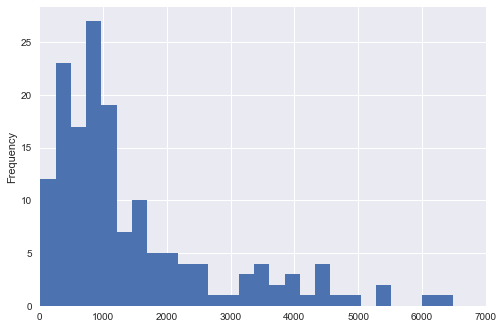

In [29]:
data[data.country=='EIRE'].sales.plot.hist(xlim=(0,7000), bins=70);

We can see that now the plot has a completely different set of fonts, color and sizes

**Be warned!** 

Different styles might not render the same results

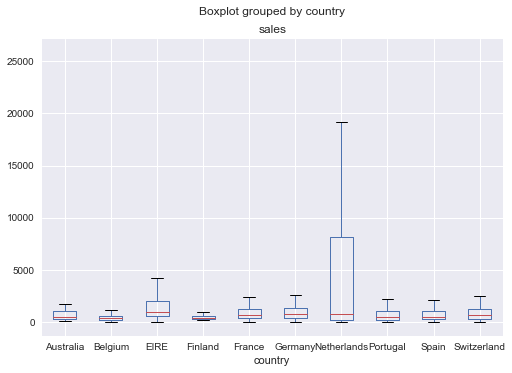

In [30]:
data.boxplot(column="sales", by="country");

For example, we see that the `seaborn` style does not display the outliers on the boxplots, so you might be mislead into believing that there are no outliers just because of how the plot style is setup!

# Labels and titles

Finally, if we wanted to share our plot with someone else (to display on a paper or to share with a client) we can make use of matplotlib customization to make our plot more explicit and nicer looking

For example, we can choose the style for another library *(ggpy, previously called ggplot)*

In [31]:
plt.style.use('ggplot')

Here we customize the chart to make it ready to be shared. We apply the following modifications:

- We use `label` inside the `plot` function to asign a label to each plot. This will draw each line a different color, and will display their name on the legend.
- We activate the plot legend with `plt.legend`
- We add a title with `plt.legend` (size 25)
- We set the range for the y-axis to (0, 12350)
- We add a legend for the x axis with `plt.xlabel` (size 20 inches)
- We add a legend for the y axis with `plt.ylabel` (size 20 inches)
- We add text on a specific position (Starting 30% from the left and 1% from the bottom)

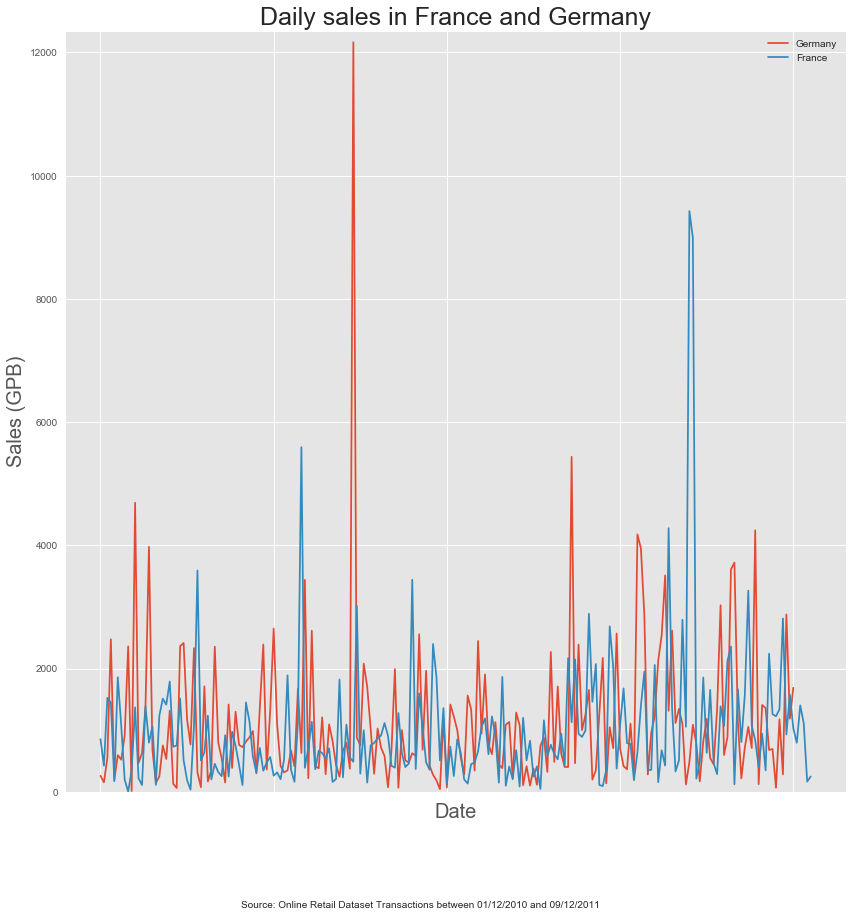

In [42]:
data_indexed[data_indexed.country=='Germany'].sales.plot(label="Germany")
data_indexed[data_indexed.country=='France'].sales.plot(label="France")
plt.ylim(0, 12350)
plt.legend()
plt.title("Daily sales in France and Germany", size=25)
plt.xlabel("Date", size=20)
plt.ylabel("Sales (GPB)", size=20)
plt.figtext(.3, .01, "Source: Online Retail Dataset Transactions between 01/12/2010 and 09/12/2011");